In [219]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
norm.cdf(1.96)

# Fixing random state for reproducibility
np.random.seed(9182020)

font = {'family': 'sans',
        'color':  'black',
        'weight': 'normal',
        'size': 24,
        }

# Helper code to allow us to color in distributions
def solve(m1,m2,std1,std2):
  a = 1/(2*std1**2) - 1/(2*std2**2)
  b = m2/(std2**2) - m1/(std1**2)
  c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
  return np.roots([a,b,c])

# Hypothesis Testing

The code below shows some of the key ideas behind hypothesis testing, using some rough approximations of batch-level election results. 

First, we start with a reported election result where the winner got ~70% of the vote. Alternatively, we can say that there was a margin of victory of 40%.

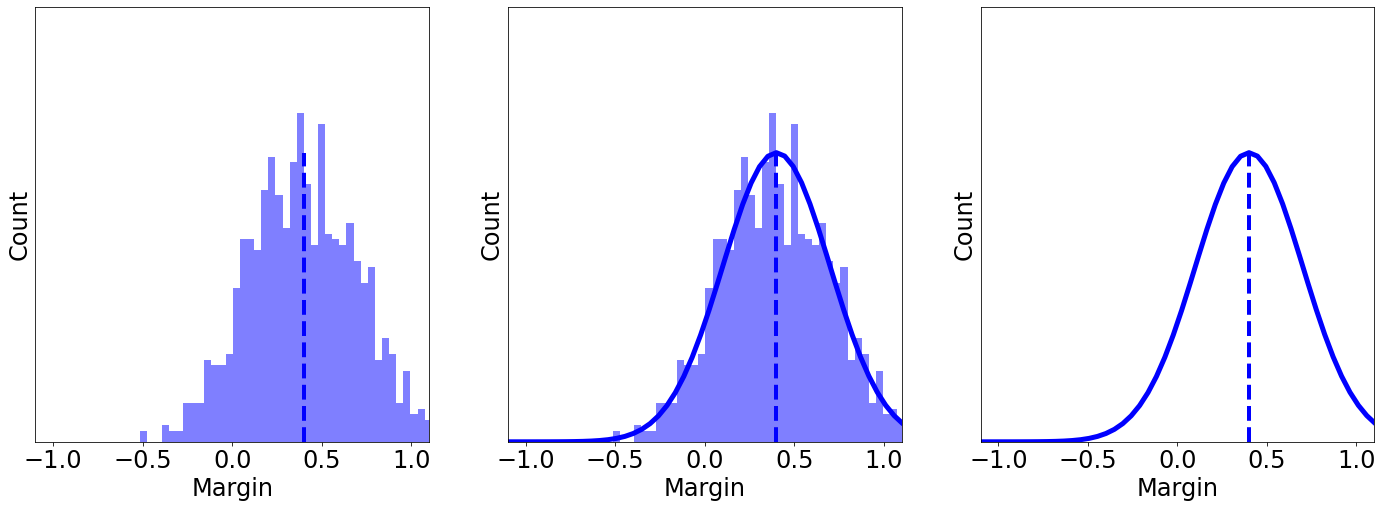

In [223]:
fig, axes = plt.subplots(1, 3, figsize=(24,8))

mu = .4 # margin of victory of 20%
sigma = .3 # spread out the margin pretty widely
results = mu + sigma * np.random.randn(1000) # Our batch totals

# the histogram of the data
n, bins, patches = axes[0].hist(results, 50, density=True, facecolor='b', alpha=0.5)
n, bins, patches = axes[1].hist(results, 50, density=True, facecolor='b', alpha=0.5)

x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)




for i, ax in enumerate(axes):
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(0, 2)
    ax.set_xlabel('Margin', fontdict=font)
    ax.set_ylabel('Count', fontdict=font)
    ax.set_yticks([])
   
    # We change the fontsize of minor ticks label 
    ax.tick_params(axis='both', which='major', labelsize=24)
    sample_mean = mu

    ax.plot([sample_mean, sample_mean ],[0.0,norm.pdf(sample_mean, mu, sigma)], 'b--', lw=4)


    if i:
        ax.plot(x,norm.pdf(x,mu,sigma), 'b-', lw=5)


For simplicity's sake, we will use a continuous distribution to represent this election going forward. But keep in mind that behind the smooth curves is a lot of lumpy data representing a "real" election. We frame this distribution as our alternative hypothesis for our risk-limiting audit hypothesis test.

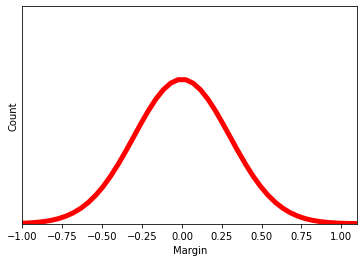

In [122]:
fig, ax = plt.subplots(1, 1)

mu = 0 # margin of victory of 20%
sigma = .3 # spread out the margin pretty widely
results = mu + sigma * np.random.randn(1000) # Our batch totals


ax.plot(x,norm.pdf(x,mu,sigma), 'r-', lw=5)

plt.ylim(0, 2)
plt.xlim(-1, 1.1)
plt.xlabel('Margin')
plt.ylabel('Count')
ax.set_yticks([])

plt.show()

Our null hypothesis is that the election was actually a tie. This is the most likely scenario where the election outcome is wrong, as it requires the least amount of error to have affected the tally. Other outcome changing scenarios (where the loser actually won) require more error and can be thought of as less likely. Since we only care about outcomes, scenarios where the winner won by more or fewer votes can be ignored.

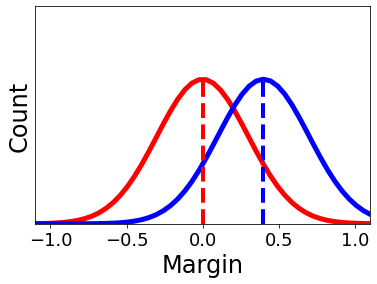

In [233]:
fig, ax = plt.subplots(1, 1)

alternative = .4
null = 0 # margin of victory of 20%
sigma = .3 # spread out the margin pretty widely
results = mu + sigma * np.random.randn(1000) # Our batch totals

ax.plot(x,norm.pdf(x,null,sigma), 'r-', lw=5)
ax.plot(x,norm.pdf(x,alternative,sigma), 'b-', lw=5)

ax.set_xlim(-1.1, 1.1)
ax.set_ylim(0, 2)
ax.set_xlabel('Margin', fontdict=font)
ax.set_ylabel('Count', fontdict=font)
ax.set_yticks([])

# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)


ax.plot([alternative, alternative ],[0.0,norm.pdf(alternative, alternative, sigma)], 'b--', lw=4)
ax.plot([null, null ],[0.0,norm.pdf(null, null, sigma)], 'r--', lw=4)


plt.show()

To confirm our election outcome, we would like to reject the null hypothesis, i.e. that the election was actually a tie. Since this is the most likely outcome-changing event, it serves as an upper bount on our risk. That is, if we can reject the hypothesis that the election was a tie, we are _also_ rejecting all scenarioes where the loser actually won.

## Sampling and looking at our data

For the sake of illustration, imagine that we take a sample of ballots and hand count them. The margin in our sample is very similar to the reported margin. Informally, the question we would like to answer is "how likely is the data we have observed if the null hypothesis was true," or more specifically "how likely are we to see a sample with a margin of 40% if the election was actually a tie?"

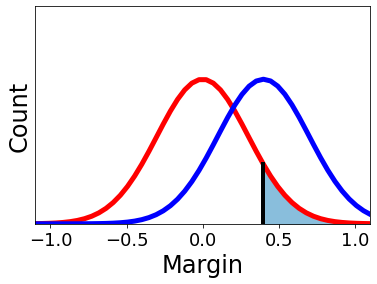

In [236]:
fig, ax = plt.subplots(1, 1)

alternative = .4
null = 0 # margin of victory of 20%
sigma = .3 # spread out the margin pretty widely
results = mu + sigma * np.random.randn(1000) # Our batch totals

ax.plot(x,norm.pdf(x,null,sigma), 'r-', lw=5)
ax.plot(x,norm.pdf(x,alternative,sigma), 'b-', lw=5)

sample_mean = .4
# pty = scipy.stats.norm.pdf(ptx,null,sigma)
plt.plot([sample_mean ,sample_mean ],[0.0,norm.pdf(sample_mean ,null, sigma)], color='black', lw=4)

ptx = np.linspace(sample_mean, 1.1, 10)
pty = norm.pdf(ptx,null,sigma)

plt.fill_between(ptx, pty, color='#89bedc', alpha=1)

p = 1 - norm(null,sigma).cdf(alternative)
         
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(0, 2)
ax.set_xlabel('Margin', fontdict=font)
ax.set_ylabel('Count', fontdict=font)
ax.set_yticks([])

# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)

plt.show()

One way to conceptualize the likelihood we would like is to assume the null is true, and then measure the probability of our observed data occuring. If our data is normally distributed, this is akin to measuring the area under the probability density function shown above at our observed margin. Here, the likelihood of finding a sample with a margin of 40% from an election that was actually a tie is less than 10%.

**Caution:** This is just for illustrative purposes. Real RLAs don't work this way for a variety of reasons, not least of which that election data may not be normally distributed and the hypothesis tests are designed to optimize for different things.

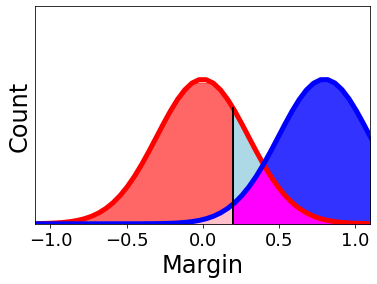

In [234]:
fig, ax = plt.subplots(1, 1)

alternative = .8
null = 0 # margin of victory of 20%
sigma = .3 # spread out the margin pretty widely
results = mu + sigma * np.random.randn(1000) # Our batch totals

ax.plot(x,norm.pdf(x,null,sigma), 'r-', lw=5)
ax.plot(x,norm.pdf(x,alternative,sigma), 'b-', lw=5)

sample_mean = .2
# pty = scipy.stats.norm.pdf(ptx,null,sigma)
plt.plot([sample_mean ,sample_mean ],[0.0,norm.pdf(sample_mean ,null, sigma)], color='black', lw=2)

# true positive
ptx = np.linspace(sample_mean, 1.1, 10)
pty = norm.pdf(ptx,alternative,sigma)

plt.fill_between(ptx, pty, color='blue', alpha=.8)

# true negative
ptx = np.linspace(-1.0, sample_mean, 10)
pty = norm.pdf(ptx,null,sigma)

plt.fill_between(ptx, pty, color='red', alpha=.6)

# false negative
ptx = np.linspace(-1.0, sample_mean, 10)
pty = norm.pdf(ptx,alternative,sigma)

plt.fill_between(ptx, pty, color='pink', alpha=1)

# False positive
ptx = np.linspace(sample_mean, 1.1, 10)
pty = norm.pdf(ptx,null,sigma)

plt.fill_between(ptx, pty, color='lightblue', alpha=1)

# In sufficient data
intersect = solve(null,alternative,.3, .3)

ptx = np.linspace(intersect[0], 1.1, 10)
pty = norm.pdf(ptx,null,sigma) 

plt.fill_between(ptx, pty, color='magenta', alpha=1)

ptx = np.linspace(sample_mean, intersect[0], 10)
pty = norm.pdf(ptx,alternative,sigma) 

plt.fill_between(ptx, pty, color='magenta', alpha=1)

ax.set_xlim(-1.1, 1.1)
ax.set_ylim(0, 2)
ax.set_xlabel('Margin', fontdict=font)
ax.set_ylabel('Count', fontdict=font)
ax.set_yticks([])

# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)


plt.show()

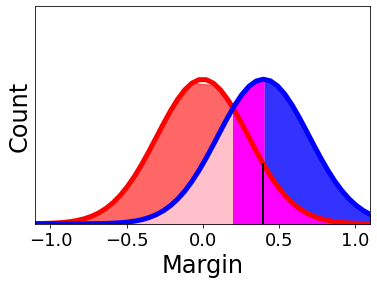

In [239]:
fig, ax = plt.subplots(1, 1)

alternative = .4
null = 0 # margin of victory of 20%
sigma = .3 # spread out the margin pretty widely
results = mu + sigma * np.random.randn(1000) # Our batch totals

ax.plot(x,norm.pdf(x,null,sigma), 'r-', lw=5)
ax.plot(x,norm.pdf(x,alternative,sigma), 'b-', lw=5)

sample_mean = .4
# pty = scipy.stats.norm.pdf(ptx,null,sigma)
plt.plot([sample_mean ,sample_mean ],[0.0,norm.pdf(sample_mean ,null, sigma)], color='black', lw=2)

# true positive
ptx = np.linspace(sample_mean, 1.1, 10)
pty = norm.pdf(ptx,alternative,sigma)

plt.fill_between(ptx, pty, color='blue', alpha=.8)

# true negative
ptx = np.linspace(-1.0, sample_mean, 10)
pty = norm.pdf(ptx,null,sigma)

plt.fill_between(ptx, pty, color='red', alpha=.6)

# false negative
ptx = np.linspace(-1.0, sample_mean, 10)
pty = norm.pdf(ptx,alternative,sigma)

plt.fill_between(ptx, pty, color='pink', alpha=1)

# False positive
ptx = np.linspace(sample_mean, 1.1, 10)
pty = norm.pdf(ptx,null,sigma)

plt.fill_between(ptx, pty, color='lightblue', alpha=1)

# Insufficient data
intersect = solve(null,sample_mean,.3, .3)

ptx = np.linspace(intersect[0], 1.1, 10)
pty = norm.pdf(ptx,null,sigma) 

plt.fill_between(ptx, pty, color='magenta', alpha=1)

ptx = np.linspace(sample_mean, intersect[0], 10)
pty = norm.pdf(ptx,alternative,sigma) 

plt.fill_between(ptx, pty, color='magenta', alpha=1)

ax.set_xlim(-1.1, 1.1)
ax.set_ylim(0, 2)
ax.set_xlabel('Margin', fontdict=font)
ax.set_ylabel('Count', fontdict=font)
ax.set_yticks([])

# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)


plt.show()